In [5]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.shape

(5572, 2)

In [10]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.dtypes

Category    object
Message     object
dtype: object

In [12]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

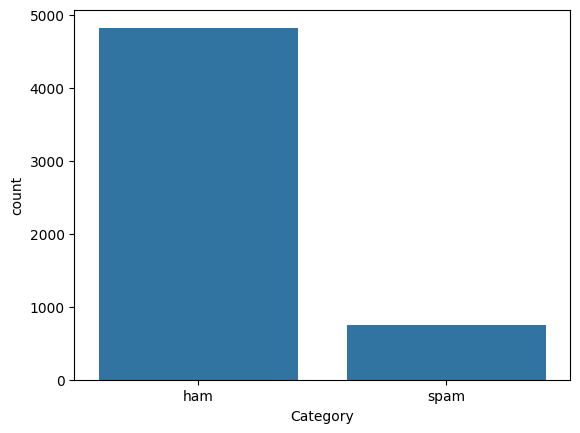

In [13]:
sns.countplot(x='Category',data=df)

In [14]:
df['Category']=df['Category'].map({'ham':0,'spam':1})
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.dtypes

Category     int64
Message     object
dtype: object

In [16]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
tweets=df.Message
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [18]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x:' '.join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [19]:
import re
tweets=tweets.str.replace('[^a-zA-z]',' ',regex=True)
tweets

0       Go until jurong point   crazy    Available onl...
1                         Ok lar     Joking wif u oni    
2       Free entry in   a wkly comp to win FA Cup fina...
3       U dun say so early hor     U c already then sa...
4       Nah I don t think he goes to usf   he lives ar...
                              ...                        
5567    This is the  nd time we have tried   contact u...
5568                Will   b going to esplanade fr home  
5569    Pity     was in mood for that   So     any oth...
5570    The guy did some bitching but I acted like i d...
5571                          Rofl   Its true to its name
Name: Message, Length: 5572, dtype: object

In [20]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
ts=tweets.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
ts

0       until jurong point crazy Available only bugis ...
1                                      lar Joking wif oni
2       Free entry wkly comp win Cup final tkts May Te...
3                      dun say early hor already then say
4         Nah don think goes usf lives around here though
                              ...                        
5567    This the time have tried contact have won the ...
5568                            Will going esplanade home
5569         Pity was mood for that any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

In [21]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower ()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       go until jurong point crazi avail onli in bugi...
1                                   ok lar joke wif u oni
2       free entri in a wkli comp to win fa cup final ...
3             u dun say so earli hor u c alreadi then say
4       nah i don t think he goe to usf he live around...
                              ...                        
5567    this is the nd time we have tri contact u u ha...
5568                        will b go to esplanad fr home
5569       piti was in mood for that so ani other suggest
5570    the guy did some bitch but i act like i d be i...
5571                              rofl it true to it name
Name: Message, Length: 5572, dtype: object

In [22]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0       go jurong point crazi avail onli bugi n great ...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkts st ...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<5572x6282 sparse matrix of type '<class 'numpy.float64'>'
	with 45095 stored elements in Compressed Sparse Row format>

In [24]:
print(data)

  (0, 5945)	0.19191381871380317
  (0, 189)	0.34741786258946855
  (0, 2202)	0.1627020796723517
  (0, 963)	0.293500014226785
  (0, 733)	0.3316479028835988
  (0, 2923)	0.28111423205343095
  (0, 6121)	0.23289830682670715
  (0, 2239)	0.1915586244074933
  (0, 735)	0.293500014226785
  (0, 3782)	0.16622425914583366
  (0, 377)	0.25985723100804897
  (0, 1166)	0.269051219419003
  (0, 4083)	0.23722426175814876
  (0, 2818)	0.34741786258946855
  (0, 2165)	0.13871624105071945
  (1, 3780)	0.564793662023427
  (1, 6042)	0.44597659211687757
  (1, 2785)	0.4745440766926726
  (1, 2951)	0.4218982744467187
  (1, 3754)	0.2809319560263009
  (2, 260)	0.18745994349289397
  (2, 4352)	0.18110296681064364
  (2, 5681)	0.13883579044473815
  (2, 5115)	0.22051655359187575
  (2, 4309)	0.18492032505232894
  :	:
  (5567, 3782)	0.20406642806669603
  (5568, 1700)	0.6652366917601374
  (5568, 1989)	0.5740672391289212
  (5568, 2449)	0.37457404553349233
  (5568, 2165)	0.29597505521175127
  (5569, 4035)	0.6038288697475673
  (5569

In [25]:
data.shape

(5572, 6282)

In [26]:
y=df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
rf=RandomForestClassifier(n_estimators=100,random_state=42)
ab=AdaBoostClassifier(n_estimators=50,random_state=1)
lst=[knn,rf,ab]

In [33]:
for i in lst:
  print('Model: ',i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('confusion matrix: \n',confusion_matrix(y_test,y_pred))
  print('accuracy score: \n',accuracy_score(y_test,y_pred))
  print('report: \n',classification_report(y_test,y_pred))
  print('*'*100)

Model:  KNeighborsClassifier(n_neighbors=7)
confusion matrix: 
 [[1448    0]
 [ 159   65]]
accuracy score: 
 0.9049043062200957
report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1448
           1       1.00      0.29      0.45       224

    accuracy                           0.90      1672
   macro avg       0.95      0.65      0.70      1672
weighted avg       0.91      0.90      0.88      1672

****************************************************************************************************
Model:  RandomForestClassifier(random_state=42)
confusion matrix: 
 [[1448    0]
 [  41  183]]
accuracy score: 
 0.9754784688995215
report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       1.00      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0